In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('agr.csv')

In [22]:
# Xử lý dữ liệu
prices = data['Price']

In [23]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [24]:
scaled_prices

array([[0.15529524],
       [0.14823492],
       [0.14862937],
       ...,
       [0.54325843],
       [0.54525062],
       [0.54724281]])

In [25]:
#RATIO 91

In [26]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.9)
test_size = int(len(scaled_prices) * 0.1)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [27]:
test_data

array([[0.41177385],
       [0.41376604],
       [0.40978166],
       [0.43368794],
       [0.41974261],
       [0.41974261],
       [0.43169575],
       [0.43767232],
       [0.43169575],
       [0.43169575],
       [0.43568013],
       [0.43568013],
       [0.44564109],
       [0.44165671],
       [0.41376604],
       [0.42372699],
       [0.41575823],
       [0.42372699],
       [0.41974261],
       [0.41575823],
       [0.42571918],
       [0.42771137],
       [0.43568013],
       [0.47153956],
       [0.48349271],
       [0.50939119],
       [0.51138338],
       [0.507399  ],
       [0.50142242],
       [0.47153956],
       [0.47751614],
       [0.47950833],
       [0.51138338],
       [0.49743804],
       [0.49743804],
       [0.50341461],
       [0.51337557],
       [0.50939119],
       [0.51735995],
       [0.51935214],
       [0.51935214],
       [0.52333652],
       [0.51536776],
       [0.50939119],
       [0.51138338],
       [0.53528966],
       [0.53728186],
       [0.527

In [28]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [29]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [30]:
X_train.shape

(1309, 30, 1)

In [31]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [33]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
21/21 [==============================] - 1s 900us/step - loss: 0.0050
Epoch 2/100
21/21 [==============================] - 0s 950us/step - loss: 0.0011
Epoch 3/100
21/21 [==============================] - 0s 950us/step - loss: 8.7111e-04
Epoch 4/100
21/21 [==============================] - 0s 900us/step - loss: 7.3960e-04
Epoch 5/100
21/21 [==============================] - 0s 850us/step - loss: 6.4325e-04
Epoch 6/100
21/21 [==============================] - 0s 900us/step - loss: 5.6836e-04
Epoch 7/100
21/21 [==============================] - 0s 900us/step - loss: 5.1577e-04
Epoch 8/100
21/21 [==============================] - 0s 900us/step - loss: 5.9479e-04
Epoch 9/100
21/21 [==============================] - 0s 950us/step - loss: 4.4124e-04
Epoch 10/100
21/21 [==============================] - 0s 850us/step - loss: 5.0395e-04
Epoch 11/100
21/21 [==============================] - 0s 1ms/step - loss: 4.7564e-04
Epoch 12/100
21/21 [==============================] - 0s 850us

In [34]:
data.index


RangeIndex(start=0, stop=1488, step=1)

In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

4/4 [==============================] - 0s 1ms/step
[[1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]
 [1516]
 [1517]
 [1518]]
1/1 [==============================] - 0s 15ms/step
[12838.813 12936.697 13292.262 13442.429 14425.662 14649.11  15172.524
 15173.798 15293.14  15146.919 15499.71  15442.173 15710.51  15769.332
 16044.378 15435.728 15836.771 15554.18  15515.334 15320.898 15753.437
 15635.465 16531.502 17093.56  17033.611 16805.041 16410.527 16089.8
 15980.88  16005.516]


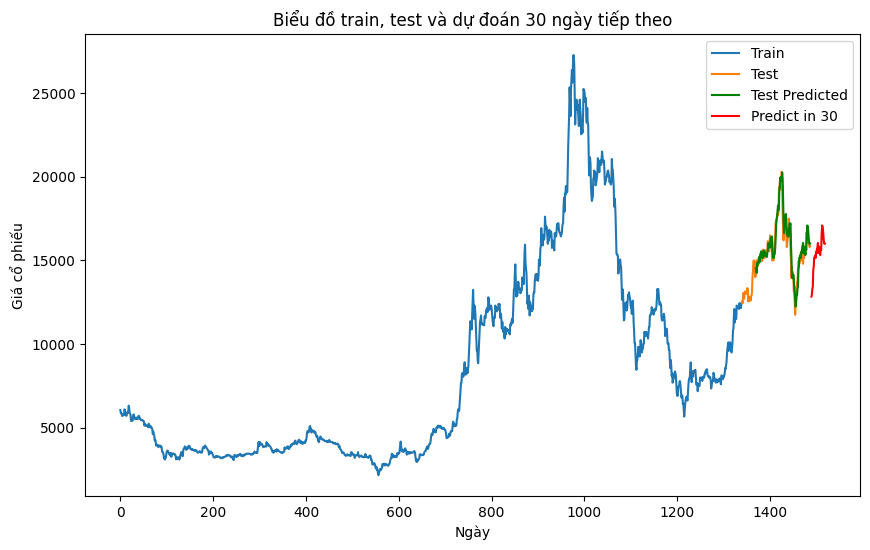

In [36]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




4/4 [==============================] - 0s 1ms/step


In [38]:
y_test1

array([[14150.],
       [14200.],
       [15000.],
       [14650.],
       [14650.],
       [14800.],
       [15050.],
       [14950.],
       [15150.],
       [15200.],
       [15200.],
       [15300.],
       [15100.],
       [14950.],
       [15000.],
       [15600.],
       [15650.],
       [15400.],
       [15300.],
       [15150.],
       [15550.],
       [15600.],
       [15200.],
       [15250.],
       [15400.],
       [15650.],
       [16150.],
       [15950.],
       [15650.],
       [15550.],
       [16000.],
       [16500.],
       [16250.],
       [16200.],
       [16400.],
       [15300.],
       [15000.],
       [15200.],
       [15000.],
       [15450.],
       [15700.],
       [16050.],
       [16500.],
       [17300.],
       [17350.],
       [17350.],
       [17750.],
       [17800.],
       [17700.],
       [17900.],
       [19150.],
       [19200.],
       [19700.],
       [19250.],
       [19400.],
       [19400.],
       [20300.],
       [19350.],
       [18000.

In [39]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 2.803
MAE: 440.802
RMSE: 587.819
MSLE: 0.037
-------------------
